<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB
None
   Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                5                        1                         1 

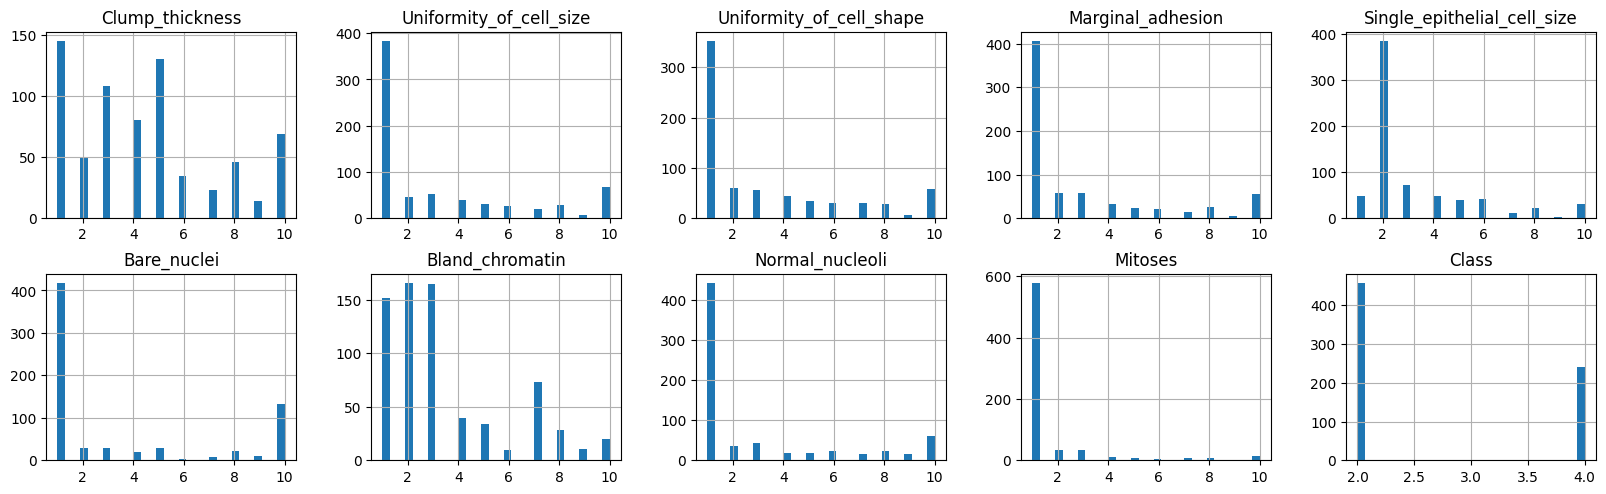

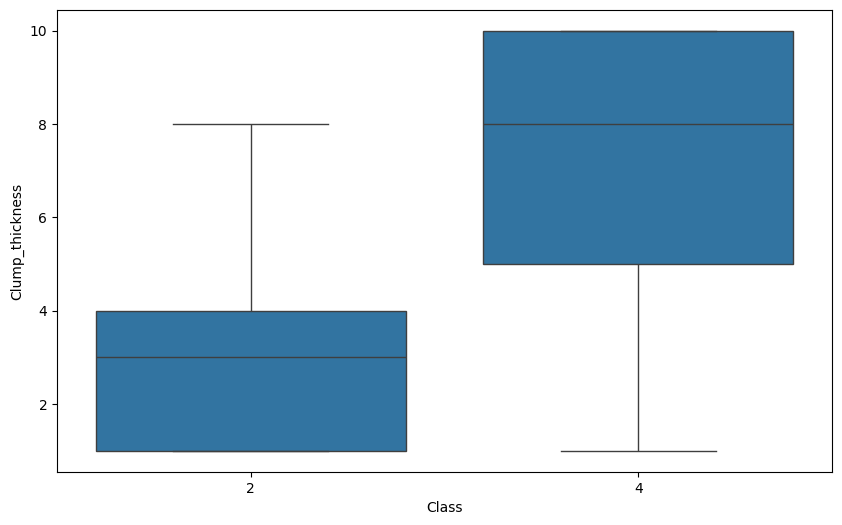

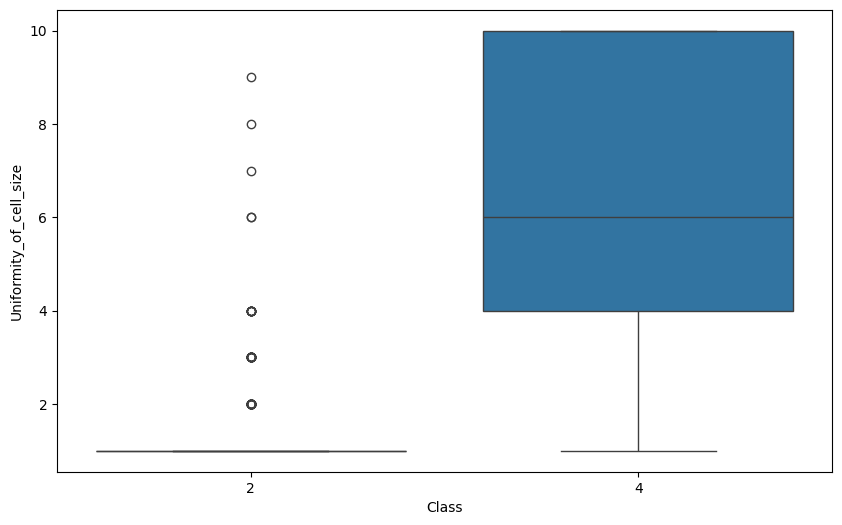

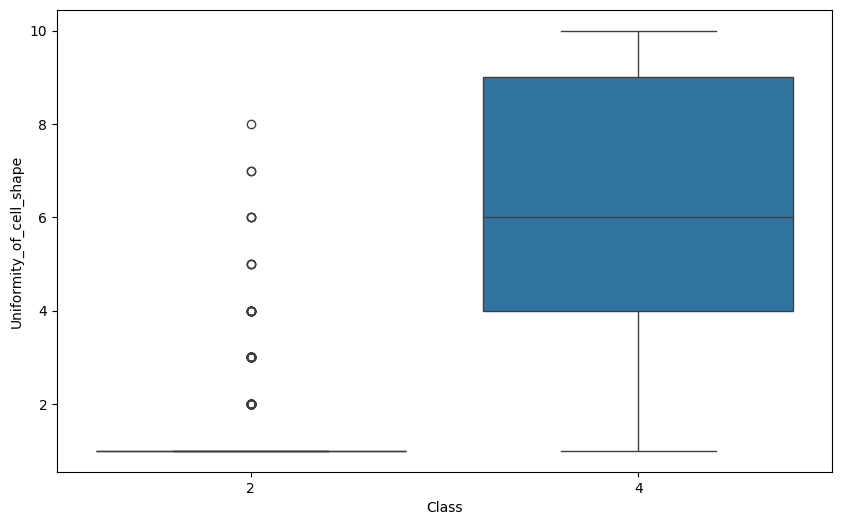

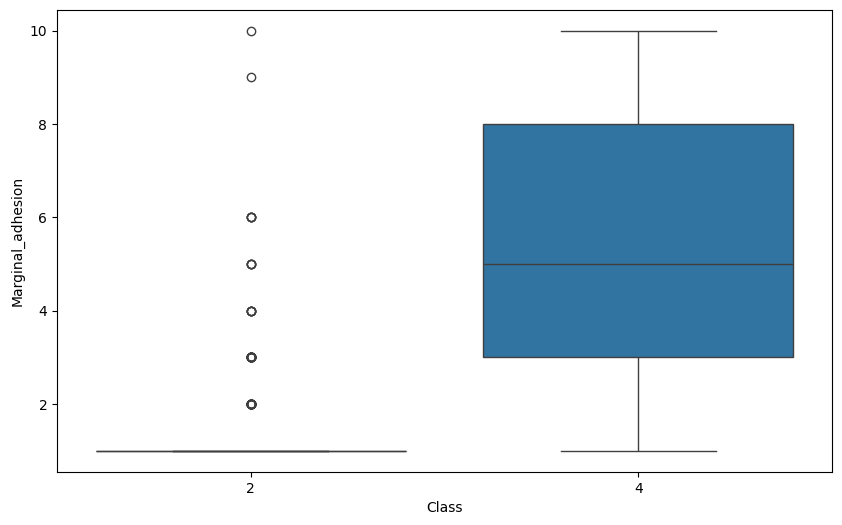

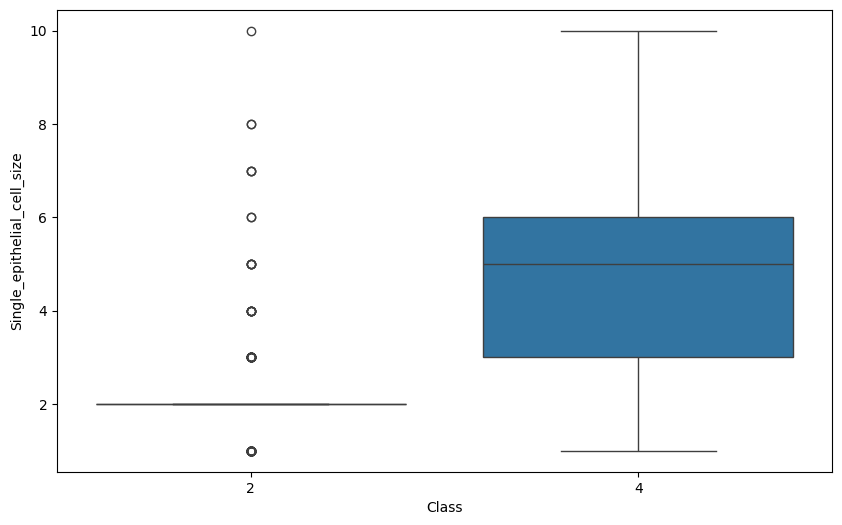

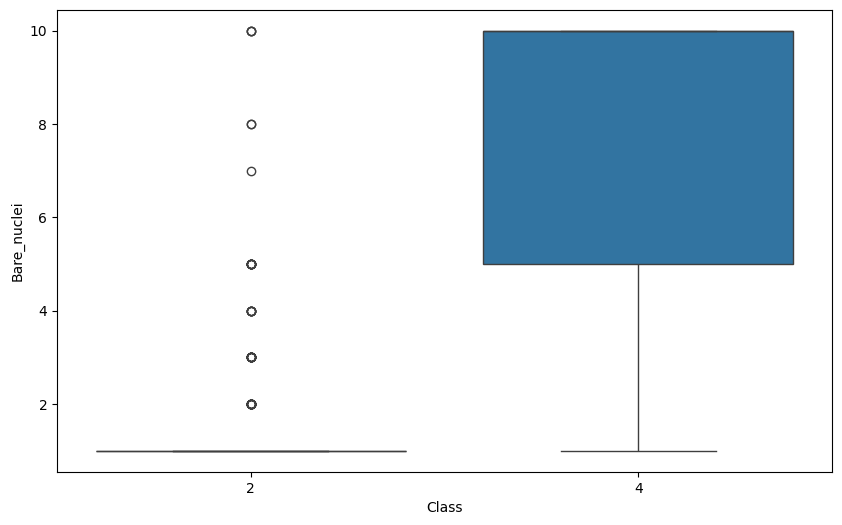

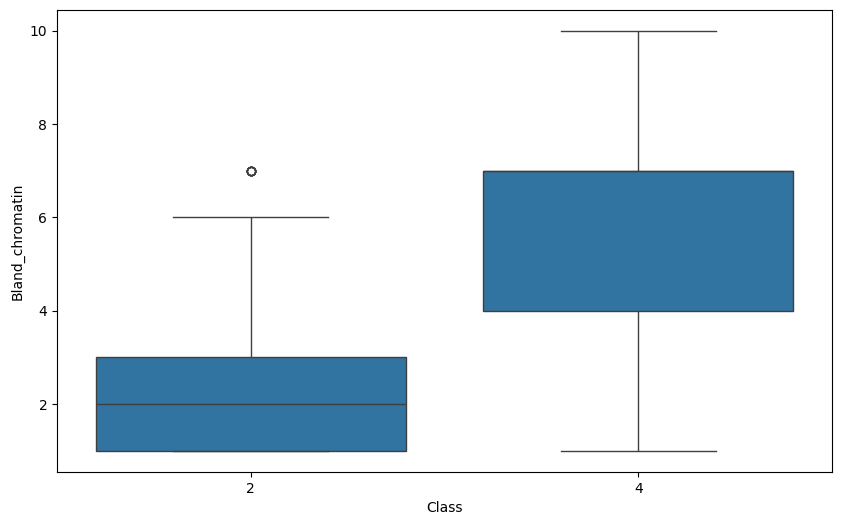

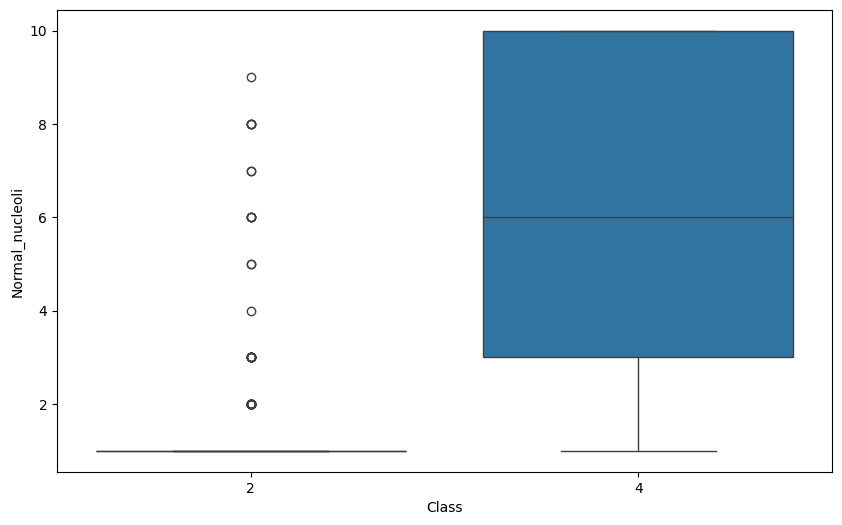

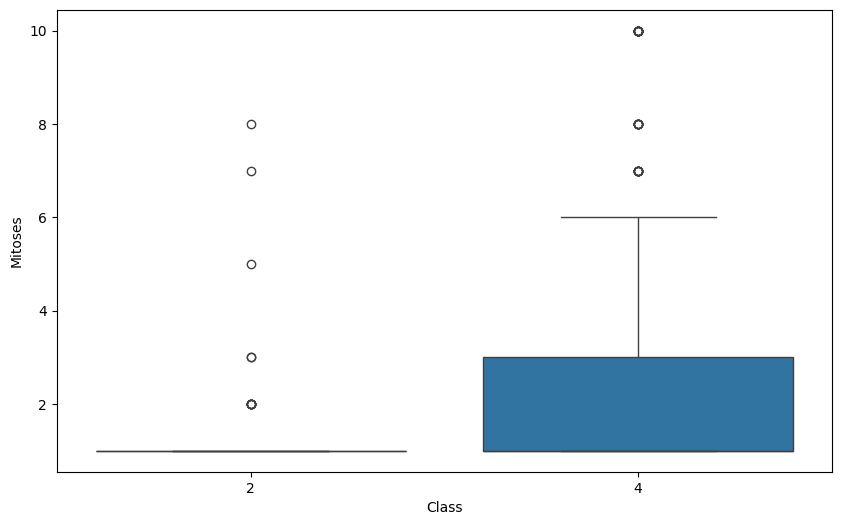

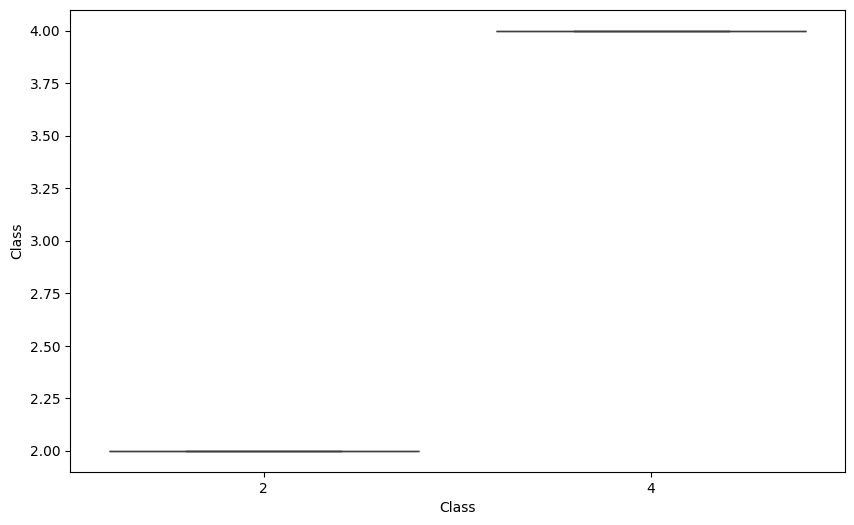

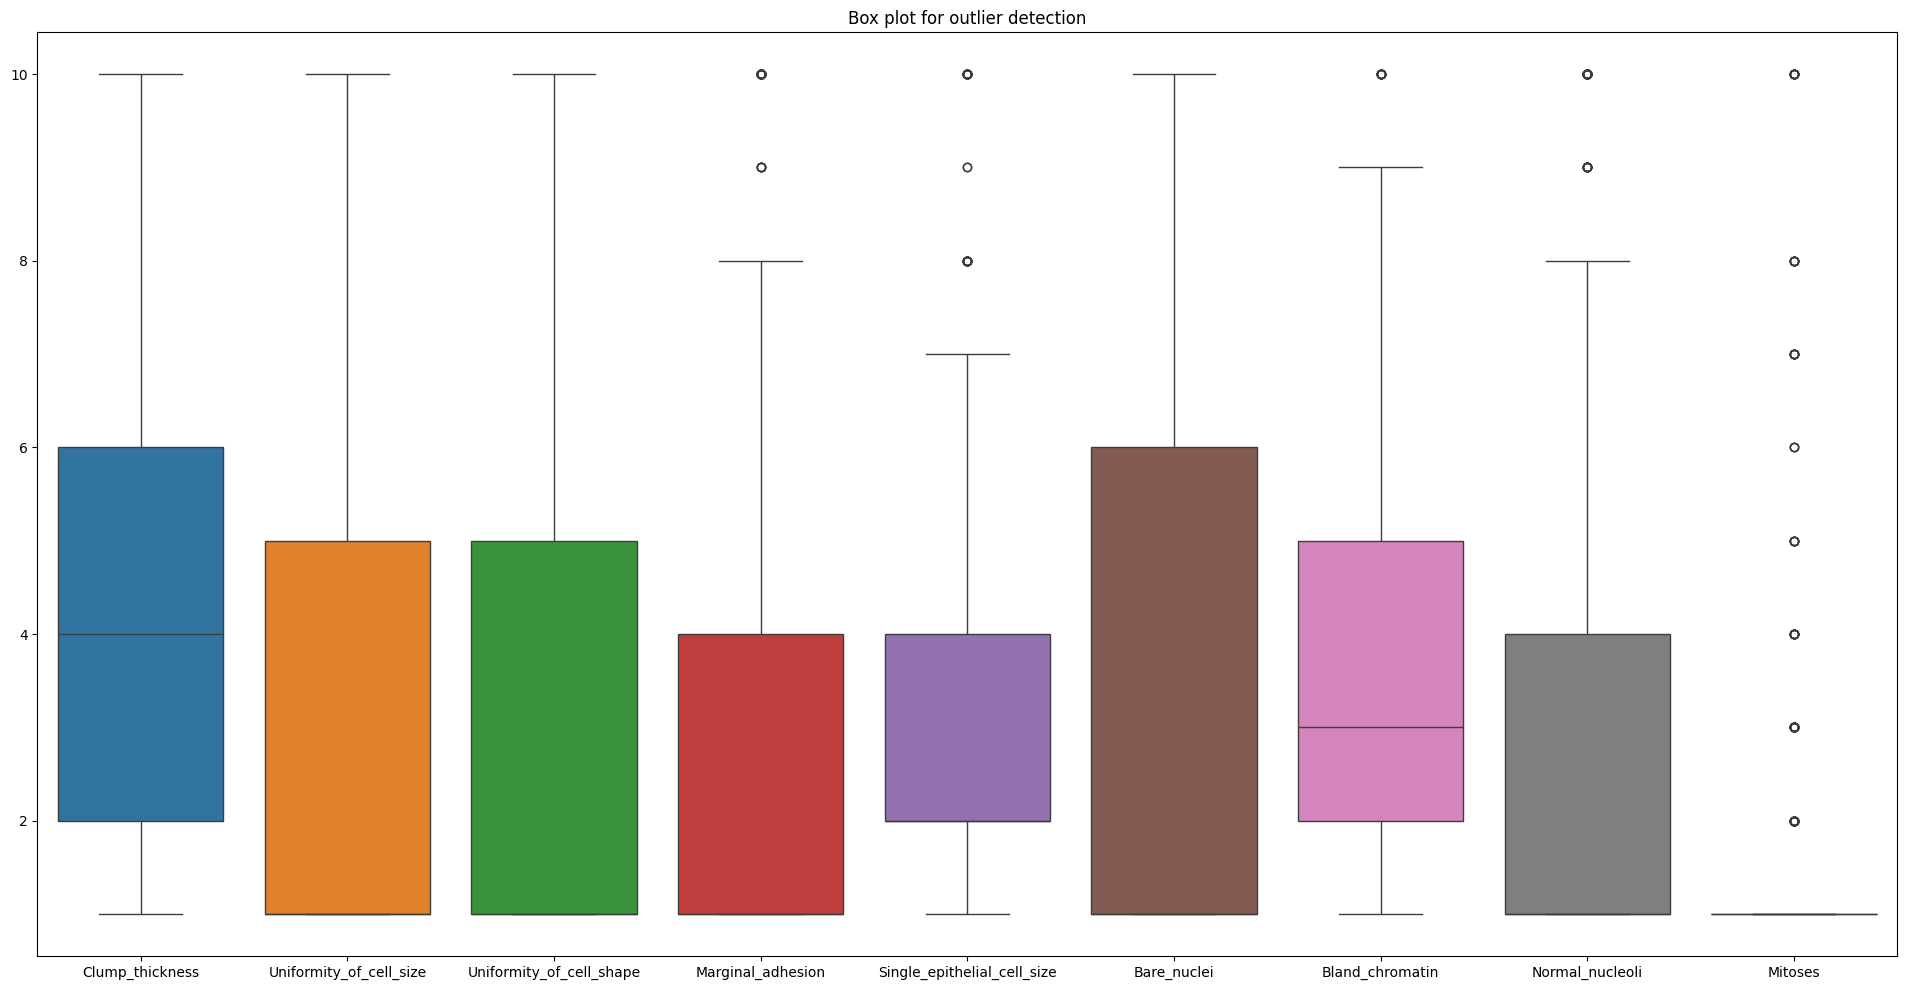

Mean of each feature:
 Clump_thickness                4.417740
Uniformity_of_cell_size        3.134478
Uniformity_of_cell_shape       3.207439
Marginal_adhesion              2.806867
Single_epithelial_cell_size    3.216023
Bare_nuclei                    3.544656
Bland_chromatin                3.437768
Normal_nucleoli                2.866953
Mitoses                        1.589413
dtype: float64

Standard Deviation of each feature:
 Clump_thickness                2.815741
Uniformity_of_cell_size        3.051459
Uniformity_of_cell_shape       2.971913
Marginal_adhesion              2.855379
Single_epithelial_cell_size    2.214300
Bare_nuclei                    3.643857
Bland_chromatin                2.438364
Normal_nucleoli                3.053634
Mitoses                        1.715078
dtype: float64

Medians of each feature:
 Clump_thickness                4.0
Uniformity_of_cell_size        1.0
Uniformity_of_cell_shape       1.0
Marginal_adhesion              1.0
Single_epithelial_cell

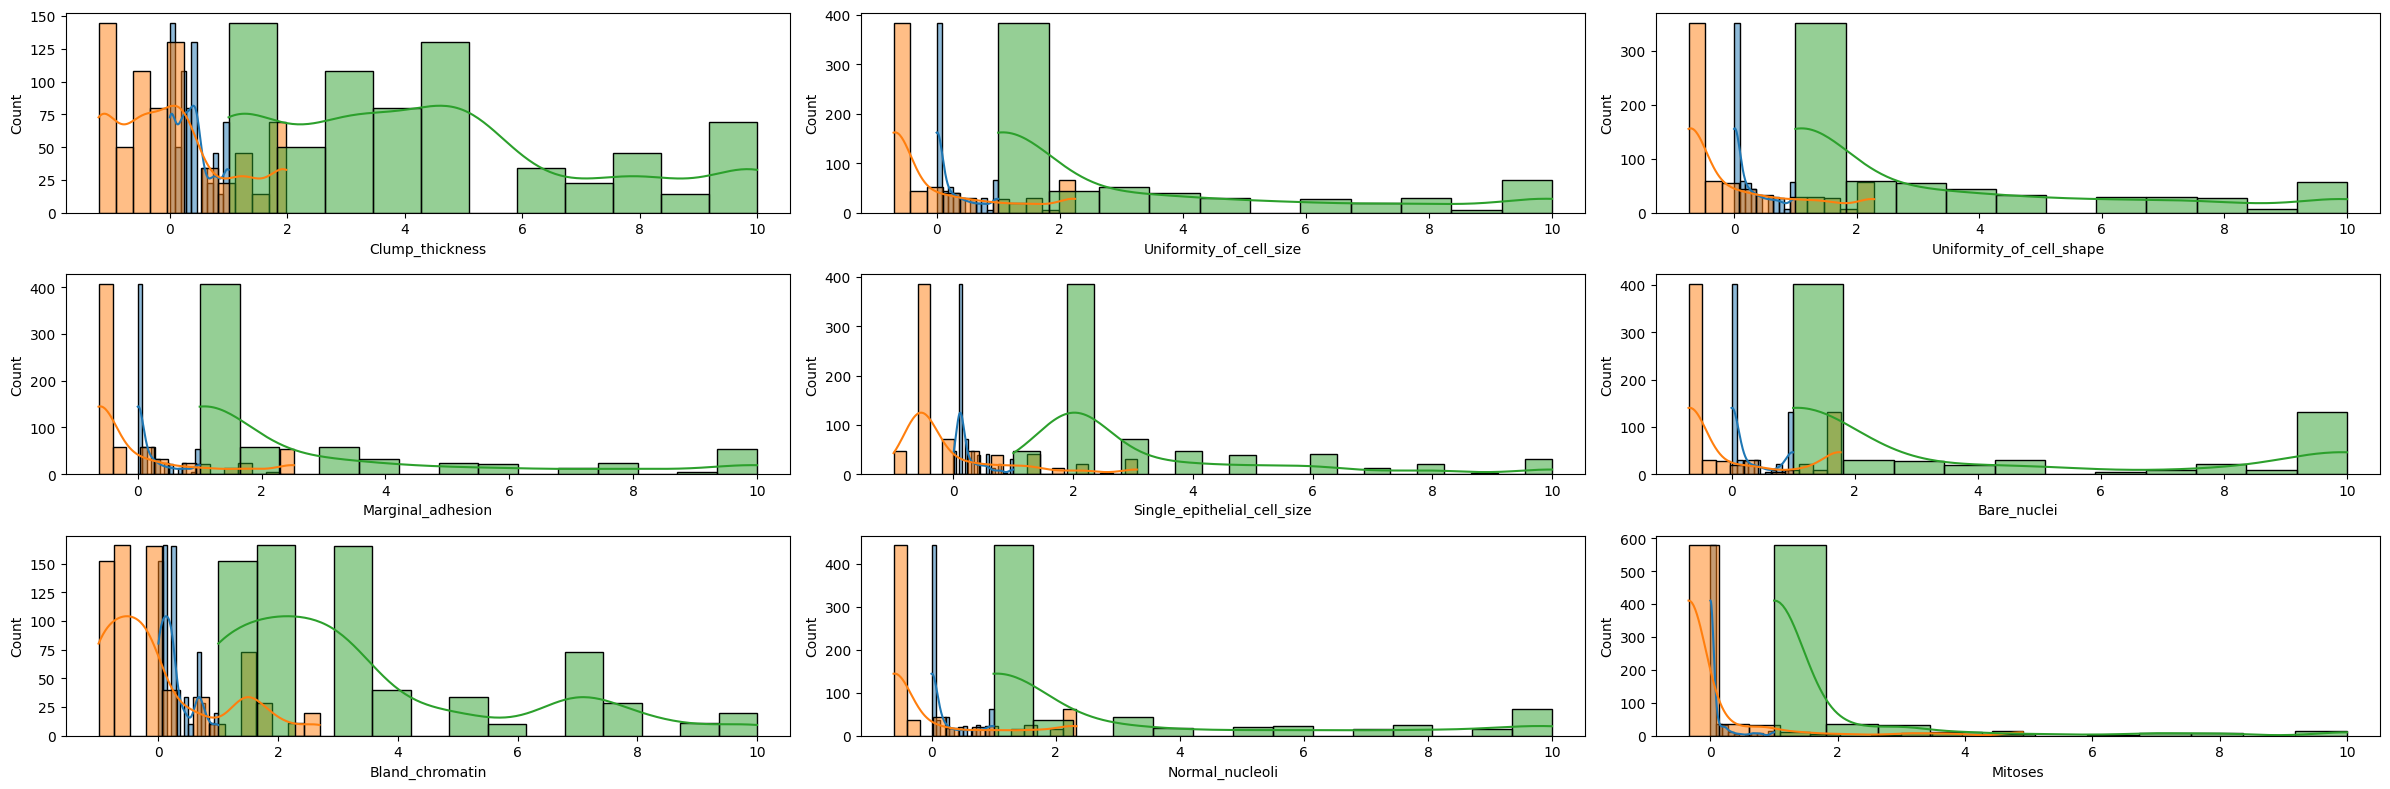


Class Distribution:
Class
2    439
4     65
Name: count, dtype: int64


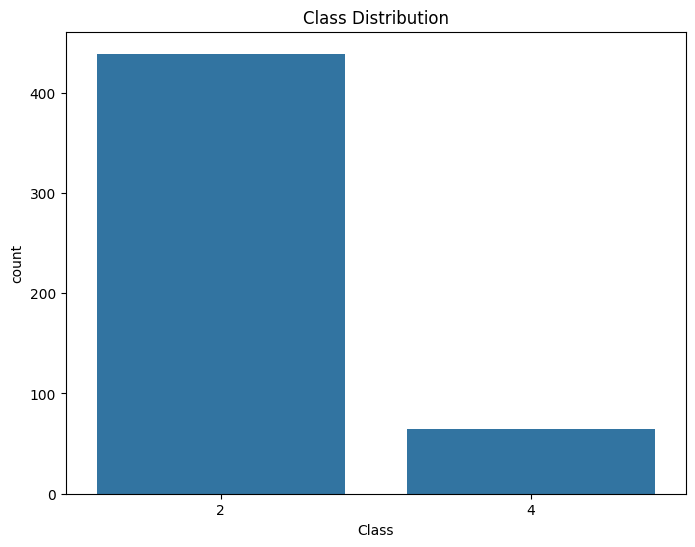

In [ ]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets


#put x and y together for convenience of EDA
df = pd.concat([X, y], axis=1)

# Display basic information about the dataset
print(df.info())

# Show the first few rows of the dataset
print(df.head())

#fill the missing value with median
df['Bare_nuclei'].fillna(df['Bare_nuclei'].median(), inplace=True)

# Display UPDATED basic information about the dataset
print(df.info())

# Show UPDATED first few rows of the dataset
print(df.head())

#shows the histogram
df.hist(bins=30, figsize=(20, 15), layout=(5, 5))
plt.show()

#showing relationship between class and features
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Class', y=col, data=df)
    plt.show()

features_to_plot = ['Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape', 'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei','Bland_chromatin','Normal_nucleoli', 'Mitoses' ]



scaler = MinMaxScaler()
X_Minmax_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Plot for outliers and distribution
plt.figure(figsize=(24, 12))
sns.boxplot(data=X)# palette="Set2"
plt.title('Box plot for outlier detection')
plt.show()

data_mean = X.mean()
data_std = X.std()
medians = X.median()
variances = X.var()

print("Mean of each feature:\n", data_mean)
print("\nStandard Deviation of each feature:\n", data_std)
print("\nMedians of each feature:\n", medians)
print("\nVariances of each feature:\n", variances)

# Perform z-score normalization
normalized_X_zscore = (X - data_mean) / data_std



# Plot histograms for some of the features
plt.figure(figsize=(24, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(X_Minmax_scaled[feature], kde=True)
    sns.histplot(normalized_X_zscore[feature], kde=True)
    sns.histplot(X[feature], kde=True)

plt.tight_layout()
plt.show()

#using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

#count class distribution
class_counts = df['Class'].value_counts()
print("\nClass Distribution:")
print(class_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()


#below is failed code just ignore
# Apply SMOTE for oversampling the minority class
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
#print(pd.Series(y_resampled).value_counts())







In [ ]:
# Skewness of the dataset
print("Skewness for each column:")
print(X.skew())

Skewness for each column:
Clump_thickness                0.592859
Uniformity_of_cell_size        1.233137
Uniformity_of_cell_shape       1.161859
Marginal_adhesion              1.524468
Single_epithelial_cell_size    1.712172
Bare_nuclei                    0.990016
Bland_chromatin                1.099969
Normal_nucleoli                1.422261
Mitoses                        3.560658
dtype: float64


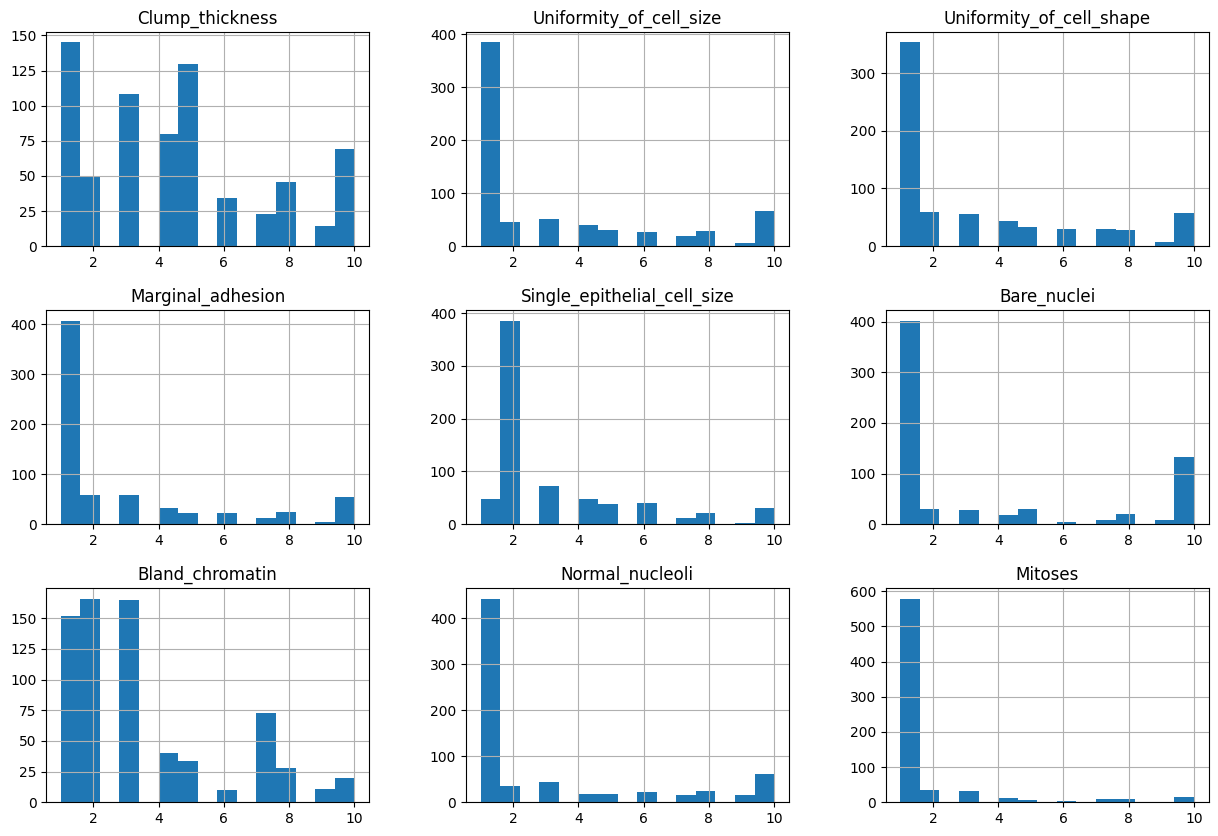

In [ ]:
# Histograms to visualize distribution
X.hist(bins=15, figsize=(15, 10))
plt.show()



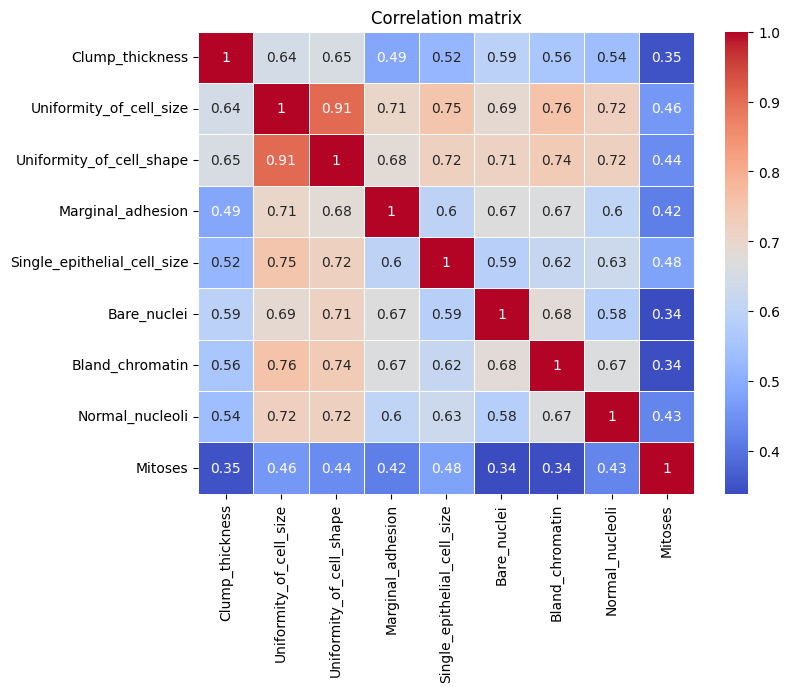

In [ ]:
# Correlation matrix
correlation_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()